In [1]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import theano.tensor as tt
import time
warnings.simplefilter(action="ignore", category=FutureWarning)

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
def logistic(x):
    return 1/(1+np.exp(-x))

In [3]:
np.random.seed(0)
d = 2
T = 5
N = 100



beta0 = 0.
mu0 = np.array([0. for _ in range(d)])
sig0 = np.diag([1. for _ in range(d)])
mu1 = np.array([0. for _ in range(d)])
sig1 = sig0 + sig0
sig10 = sig0

In [4]:
nodes = {}
with pm.Model() as first_model:
    #priors on parameters
    nodes[0] = pm.MvNormal('beta', mu=mu0, cov=sig0, shape=(2,))
    for t in range(1,T+1):
        nodes[t] = pm.MvNormal('b_{0}'.format(t), mu=nodes[t-1], cov=sig0,shape=(2,))
    
    start = pm.find_MAP()
    

/home/james/miniconda3/envs/bps/lib/python3.8/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/home/james/miniconda3/envs/bps/lib/python3.8/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


In [5]:
num_chains = 1

In [6]:
start = time.time()
with first_model:    
    #samples from posterior distribution 
    trace=pm.sample(2000, tune=100, cores=num_chains, chains=num_chains, compute_convergence_checks=False)
duration = time.time()-start
print(duration)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [b_5, b_4, b_3, b_2, b_1, beta]


Sampling 1 chain for 100 tune and 2_000 draw iterations (100 + 2_000 draws total) took 69 seconds.
The acceptance probability does not match the target. It is 0.8863385662042079, but should be close to 0.8. Try to increase the number of tuning steps.


70.60725235939026


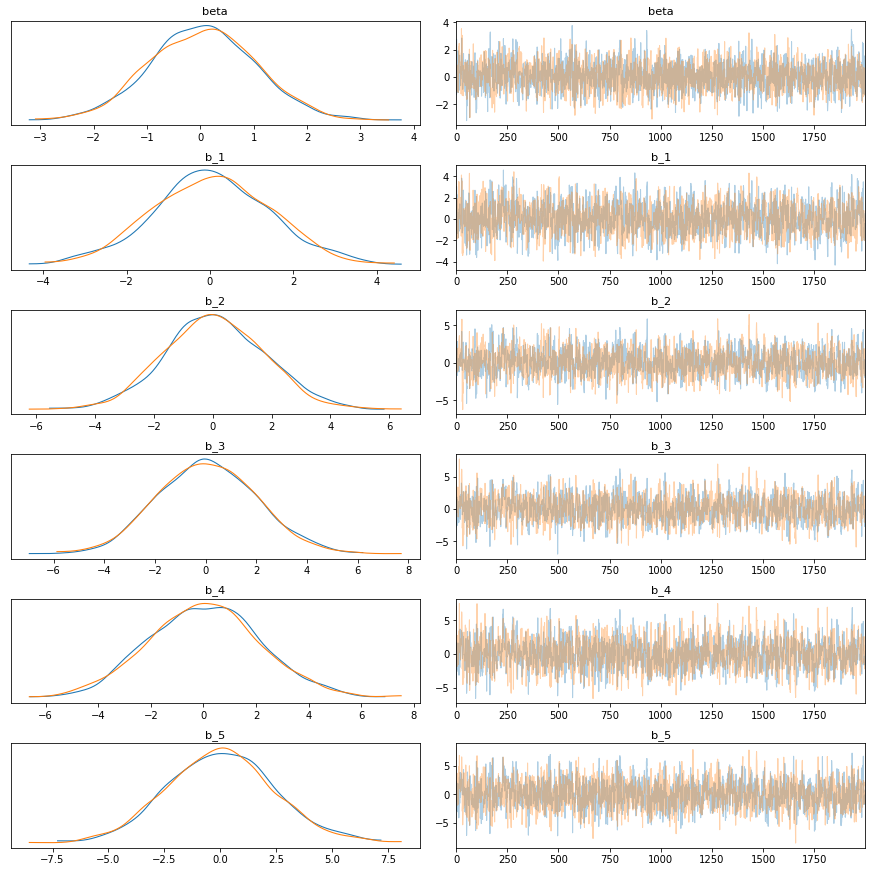

In [8]:
with first_model:
    az.plot_trace(trace)

In [9]:
df = az.summary(trace, round_to=2)

arviz - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)


In [ ]:
cols = [col for col in df.columns if 'ess' in col]
df[cols]/duration/num_chains

In [ ]:
betas

In [10]:
df

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
beta[0],0.05,1.00,-1.77,1.99,0.03,0.02,1022.42,1022.42,1033.04,1111.27,NaN
beta[1],0.05,1.00,-1.72,2.00,0.03,0.02,1039.47,1029.58,1036.76,1328.67,NaN
b_1[0],0.06,1.42,-2.81,2.77,0.06,0.04,660.01,660.01,655.70,1005.01,NaN
b_1[1],0.04,1.40,-2.43,2.68,0.05,0.03,916.45,916.45,925.30,1336.12,NaN
b_2[0],0.11,1.71,-3.24,3.23,0.07,0.05,587.11,587.11,584.36,825.59,NaN
b_2[1],0.04,1.70,-3.01,3.14,0.06,0.04,895.04,895.04,891.78,1177.91,NaN
b_3[0],0.09,1.95,-3.37,3.84,0.08,0.06,533.92,533.92,535.74,677.15,NaN
b_3[1],0.06,1.97,-3.46,3.86,0.06,0.05,942.18,890.26,945.85,1206.68,NaN
b_4[0],0.07,2.15,-3.86,4.13,0.09,0.07,533.95,533.95,534.85,647.58,NaN
b_4[1],0.04,2.21,-4.17,4.19,0.07,0.05,968.02,968.02,966.02,1112.54,NaN
